# <center>Laboratorio 05 -Análisis de Sentimientos
    
* Karina Valladares (18005)   
* José López (181045)   
* Alexa Bravo (18831)  

In [38]:
#Importamos las librerias a utilizar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neattext as nt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
import qgrid

In [39]:
def sentiment_scores(sentence): 
  
     #Se crea el objeto SentimentIntensityAnalyzer. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    #polarity_scores tiene las puntuaciones para saber que tipo de emoción es. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
      
    print("Overall sentiment dictionary is : ", sentiment_dict) 
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
    print("Sentence Overall Rated As", end = " ") 
  
    #Se clasifica el sentimiento como positivo, negativo o neutro.
    if sentiment_dict['compound'] >= 0.05 : 
        print("Positive") 
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        print("Negative") 
  
    else : 
        print("Neutral")

In [40]:
def sentiment_scores_modified(sentence): 
  
    #Se crea el objeto SentimentIntensityAnalyzer.
    sid_obj = SentimentIntensityAnalyzer() 
  
    #polarity_scores tiene las puntuaciones para saber que tipo de emoción es.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
    negative.append(sentiment_dict['neg']*100)
    neutral.append(sentiment_dict['neu']*100)
    positive.append(sentiment_dict['pos']*100)
    overall.append(sentiment_dict['compound']*100)
    
#Función para clasifica el sentimiento como positivo, negativo o neutro.
def calisificar(df):
    resultados = []
    for i in range(len(df)):
        if df["Overall (%)"][i] >= 0.05:
            resultados.append("Positivo")
        elif df["Overall (%)"][i] <= -0.05:
            resultados.append("Negativo")
        else:
            resultados.append("Neutral")
    return resultados

In [41]:
#Cargamos la data a utilizar en el laboratorio. 
#Es importante cambiar el "path", dependiendo de dónde se corra.
path = "C:/Users/DELL/Desktop/Laboratorio_5"
data = pd.read_csv(path + "/GrammarandProductReviews.csv")

In [42]:
data

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71039,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,6855681.0,6.0,5,https://www.walmart.com/reviews/product/10294231,I'm dealing with dry eyes and very sensitive t...,Solves the problem,NaN,NaN,Seniorgal,"300650361040,631113253665,300650193108,3006503..."
71040,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,71102868.0,1.0,5,https://www.walmart.com/reviews/product/10294231,Great stuff! Helps keep my contacts moist all ...,Great stuff!,NaN,NaN,Nammaw,"300650361040,631113253665,300650193108,3006503..."
71041,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,58039428.0,0.0,5,https://www.walmart.com/reviews/product/10294231,Right price,My review,NaN,NaN,LDBoston,"300650361040,631113253665,300650193108,3006503..."
71042,AVzvTLfivKc47QAVfPme,Bebe Au Lait,"Baby,Nursing & Feeding,Breastfeeding,Nursing C...",2017-06-28T15:23:21Z,2018-02-05T10:19:41Z,8.78982E+11,"878982005883,bebeaulait/50032623,08789820

El dataset cuenta con 71044 reviews de 1000 productos diferentes en 25 columnas en las que se encuentra el título y texto de los reviews, el nombre del productor, algunos datos del cliente, entre otros.

In [43]:
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,3.215800e+04,32508.000000,71044.000000
mean,7.944753e+07,0.410422,4.385747
std,4.842696e+07,3.574442,1.067659
min,2.187400e+04,0.000000,1.000000
25%,3.355342e+07,0.000000,4.000000
50%,7.124763e+07,0.000000,5.000000
75%,1.112628e+08,0.000000,5.000000
max,1.038227e+09,183.000000,5.000000


In [44]:
#Vemos el nombre y la cantidad de datos de cada columna.
data.isna().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64

De la sección anterior, podemos observar que existen bastantes datos faltantes en algunas columnas. Resaltan aquellas que serán necesarias para el estudio, como el texto del review, aunque en comparación a la totalidad de datos, son pocos los que hacen falta (36). 

In [99]:
data.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc'],
      dtype='object')

### Limpieza de Datos

In [46]:
#Eliminamos las columnas de datos que no vamos a utilizar en este laboratorio
data_limpieza = data.drop(columns = ["dateAdded", "dateUpdated", "ean", "manufacturerNumber", "reviews.date", "reviews.dateAdded",
                                    "reviews.dateSeen", "reviews.sourceURLs", "reviews.numHelpful", "reviews.userCity", "reviews.userProvince","upc",
                                    "reviews.didPurchase", "reviews.doRecommend", "reviews.id", "keys", "reviews.title", "categories"])

In [47]:
#Vemos las columnas de datos con las que vamos a trabajar.
data_limpieza.columns

Index(['id', 'brand', 'manufacturer', 'name', 'reviews.rating', 'reviews.text',
       'reviews.username'],
      dtype='object')

In [48]:
s = data_limpieza["reviews.text"]

#### Pasamos todo a mayúsculas

In [49]:
s = s.str.upper()

In [50]:
s

0        I LOVE THIS ALBUM. IT'S VERY GOOD. MORE TO THE...
1        GOOD FLAVOR. THIS REVIEW WAS COLLECTED AS PART...
2                                             GOOD FLAVOR.
3        I READ THROUGH THE REVIEWS ON HERE BEFORE LOOK...
4        MY HUSBAND BOUGHT THIS GEL FOR US. THE GEL CAU...
                               ...                        
71039    I'M DEALING WITH DRY EYES AND VERY SENSITIVE T...
71040    GREAT STUFF! HELPS KEEP MY CONTACTS MOIST ALL ...
71041                                          RIGHT PRICE
71042    I WAS SO PLEASED WHEN THIS SCARF ARRIVED FOR M...
71043    EXCELLENT ALBUM, MAKES THE HOLIDAYS BETTER, GI...
Name: reviews.text, Length: 71044, dtype: object

#### Removemos los Stop Words

In [51]:
for i in range(len(s)):
    s[i] = nt.TextFrame(str(s[i])).remove_stopwords(lang = "en")

In [52]:
s

0        LOVE ALBUM. GOOD. HIP HOP CURRENT POP SOUND.. ...
1                 GOOD FLAVOR. REVIEW COLLECTED PROMOTION.
2                                             GOOD FLAVOR.
3        READ REVIEWS LOOKING BUYING COUPLES LUBRICANTS...
4        HUSBAND BOUGHT GEL US. GEL CAUSED IRRITATION F...
                               ...                        
71039    I'M DEALING DRY EYES SENSITIVE PRODUCTS. EYE C...
71040               GREAT STUFF! HELPS CONTACTS MOIST DAY!
71041                                          RIGHT PRICE
71042    PLEASED SCARF ARRIVED MULTIPLE REASONS. PRINT ...
71043    EXCELLENT ALBUM, MAKES HOLIDAYS BETTER, GIVES ...
Name: reviews.text, Length: 71044, dtype: object

#### Removemos los signos de puntuación 

In [53]:
for i in range(len(s)):
    s[i] = nt.TextFrame(str(s[i])).remove_puncts()

In [54]:
s

0        LOVE ALBUM GOOD HIP HOP CURRENT POP SOUND HYPE...
1                   GOOD FLAVOR REVIEW COLLECTED PROMOTION
2                                              GOOD FLAVOR
3        READ REVIEWS LOOKING BUYING COUPLES LUBRICANTS...
4        HUSBAND BOUGHT GEL US GEL CAUSED IRRITATION FE...
                               ...                        
71039    IM DEALING DRY EYES SENSITIVE PRODUCTS EYE CLI...
71040                 GREAT STUFF HELPS CONTACTS MOIST DAY
71041                                          RIGHT PRICE
71042    PLEASED SCARF ARRIVED MULTIPLE REASONS PRINT C...
71043    EXCELLENT ALBUM MAKES HOLIDAYS BETTER GIVES NI...
Name: reviews.text, Length: 71044, dtype: object

#### Removemos los Caracteres especiales

In [55]:
for i in range(len(s)):
    s[i] = nt.TextFrame(str(s[i])).remove_special_characters()

In [56]:
s

0        LOVE ALBUM GOOD HIP HOP CURRENT POP SOUND HYPE...
1                   GOOD FLAVOR REVIEW COLLECTED PROMOTION
2                                              GOOD FLAVOR
3        READ REVIEWS LOOKING BUYING COUPLES LUBRICANTS...
4        HUSBAND BOUGHT GEL US GEL CAUSED IRRITATION FE...
                               ...                        
71039    IM DEALING DRY EYES SENSITIVE PRODUCTS EYE CLI...
71040                 GREAT STUFF HELPS CONTACTS MOIST DAY
71041                                          RIGHT PRICE
71042    PLEASED SCARF ARRIVED MULTIPLE REASONS PRINT C...
71043    EXCELLENT ALBUM MAKES HOLIDAYS BETTER GIVES NI...
Name: reviews.text, Length: 71044, dtype: object

#### Removemos E-Mails, Números, Números de Teléfono, BTC Adresses, URL's

In [57]:
for i in range(len(s)):
    s[i] = nt.TextFrame(str(s[i])).remove_emails()
    s[i] = nt.TextFrame(str(s[i])).remove_numbers()
    s[i] = nt.TextFrame(str(s[i])).remove_phone_numbers()
    s[i] = nt.TextFrame(str(s[i])).remove_btc_address()
    s[i] = nt.TextFrame(str(s[i])).remove_urls()
    s[i] = nt.TextFrame(str(s[i])).remove_stopwords(lang = "en")

In [58]:
final_string = ""
for i in s:
    final_string += str(i) + " "
final_string = final_string[:-1]


In [59]:
text_frame = nt.TextFrame(final_string)

In [60]:
text_frame.describe()

Key      Value          
Length  : 8181183        
vowels  : 2611976        
consonants: 4378639        
stopwords: 0              
punctuations: 0              
special_char: 0              
tokens(whitespace): 1190561        
tokens(words): 1190561        


In [61]:
data_limpieza["reviews.text"] = s

In [62]:
data_limpieza

,id,brand,manufacturer,name,reviews.rating,reviews.text,reviews.username
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,LOVE ALBUM GOOD HIP HOP CURRENT POP SOUND HYPE...,Joshua
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,GOOD FLAVOR REVIEW COLLECTED PROMOTION,Dorothy W
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,GOOD FLAVOR,Dorothy W
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y,K-Y Love Sensuality Pleasure Gel,1,READ REVIEWS LOOKING BUYING COUPLES LUBRICANTS...,Rebecca
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y,K-Y Love Sensuality Pleasure Gel,1,HUSBAND BOUGHT GEL GEL CAUSED IRRITATION FELT ...,Walker557
...,...,...,...,...,...,...,...
71039,AVzRGDlw-jtxr-f3yfFH,Opti-Free,Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,IM DEALING DRY EYES SENSITIVE PRODUCTS EYE CLI...,Seniorgal
71040,AVzRGDlw-jtxr-f3yfFH,Opti-Free,Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,GREAT STUFF HELPS CONTACTS MOIST DAY,Nammaw
71041,AVzRGDlw-jtxr-f3yfFH,Opti-Free,Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,RIGHT PRICE,LDBoston
71042,AVzvTLfivKc47QAVfPme,Bebe Au Lait,Bebe au Lait,Bebe Au Lait174 Premium Muslin Nursing Scarf -...,5,PLEASED SCARF ARRIVED MULTIPLE REASONS PRINT C...,Vanessag


In [63]:
data_limpieza["reviews.rating"].value_counts().to_frame()

,reviews.rating
5,46543
4,14598
3,4369
1,3701
2,1833


#### Frecuencia de Palabras

In [64]:
repetida = text_frame.term_freq()
repetida

{'LOVE': 0.8067888857061014,
 'ALBUM': 0.010264489640026735,
 'GOOD': 0.5825455934307266,
 'HIP': 0.0003341926859543588,
 'HOP': 0.00019096724911677647,
 'CURRENT': 0.005299341162990547,
 'POP': 0.015325121741621312,
 'SOUND': 0.037047646328654635,
 'HYPE': 0.002816766924472453,
 'LISTEN': 0.006158693784016041,
 'EVERYDAY': 0.036713453642700275,
 'GYM': 0.0040580540437315,
 'STAR': 0.014083834622362264,
 'RATING': 0.005824501098061682,
 'WAY': 0.15143702854960375,
 'METAPHORS': 4.774181227919412e-05,
 'CRAZY': 0.011171584073331424,
 'FLAVOR': 0.01752124510646424,
 'REVIEW': 0.9026544447627232,
 'COLLECTED': 0.8462713644609949,
 'PROMOTION': 0.8466532989592285,
 'READ': 0.01833285591521054,
 'REVIEWS': 0.0292179891148668,
 'LOOKING': 0.1022629619020338,
 'BUYING': 0.055666953117540344,
 'COUPLES': 0.0004774181227919412,
 'LUBRICANTS': 4.774181227919412e-05,
 'ULTIMATELY': 0.0011458034947006588,
 'DISAPPOINTED': 0.05738565835959133,
 'LIVE': 0.037477322639167386,
 'STARTERS': 0.000525159

In [65]:
palabras = []
frecuencias = []
for i in repetida.keys():
    palabras.append(i)

for k in repetida.values():
    frecuencias.append(k)

In [66]:
index1 = frecuencias.index(max(frecuencias))
pa1 = palabras[index1]
frecuencias.pop(index1)

index2 = frecuencias.index(max(frecuencias))
pa2 = palabras[index2]
frecuencias.pop(index2)

index3 = frecuencias.index(max(frecuencias))
pa3 = palabras[index3]
frecuencias.pop(index3)

print("La palabra más frecuente es: ", pa1)
print("La segunda palabra más frecuente es:", pa2)
print("La tercera palabra más frecuente es:", pa3)

La palabra más frecuente es:  GREAT
La segunda palabra más frecuente es: PRODUCT
La tercera palabra más frecuente es: GRANDSON


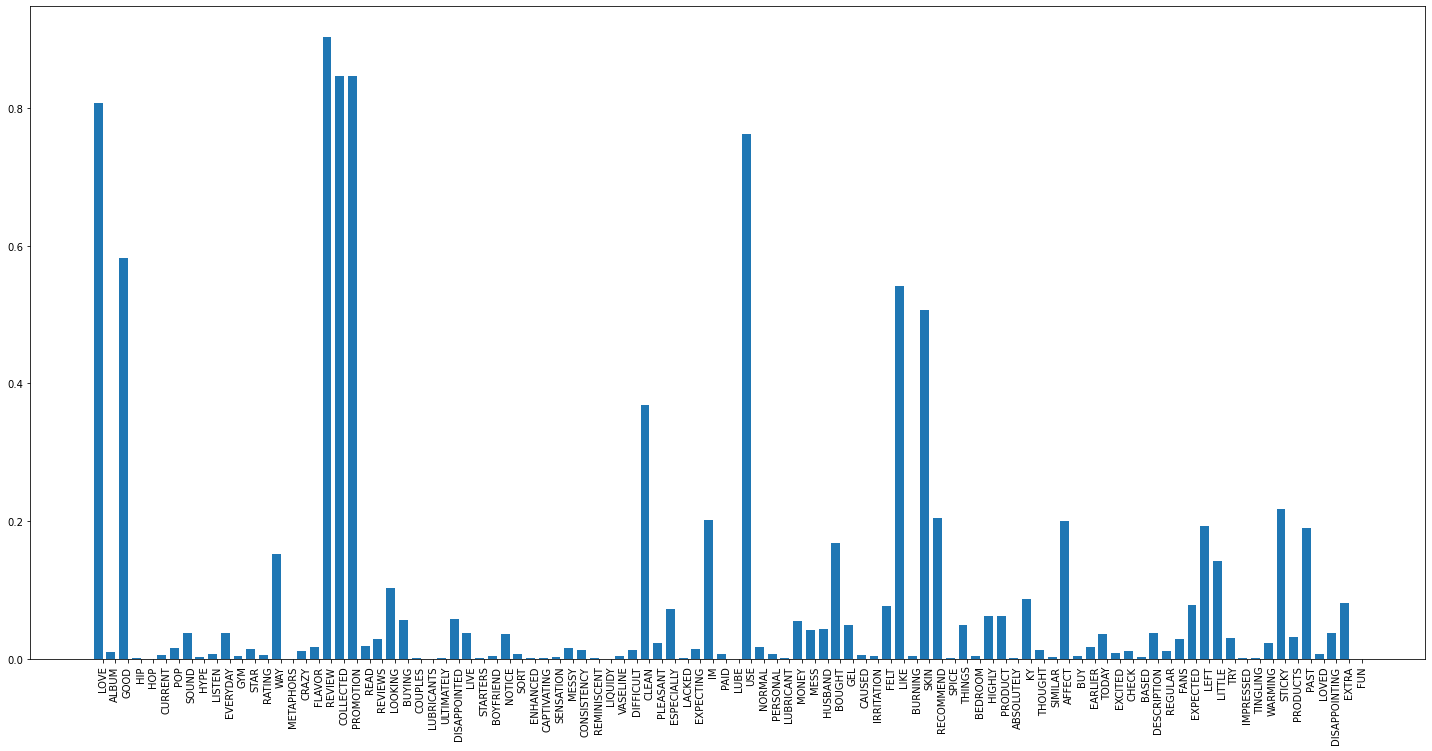

In [67]:
n = 100
words = palabras[0:n]
freq = frecuencias[0:n]

# Plot histogram using matplotlib bar().
indexes = np.arange(len(words))
width = 0.7

fig = plt.figure(figsize = (25, 12 ))
plt.bar(indexes, freq, width)
plt.xticks(indexes + width * 0.5, words)
plt.xticks(rotation = 90)
plt.show()

#### WordCloud

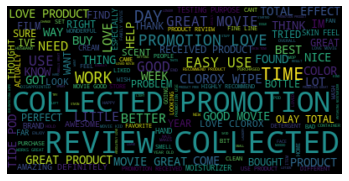

In [68]:
wordcloud = WordCloud().generate(str(text_frame))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Clasificación de las Oraciones

In [69]:
negative = []
neutral = []
positive = []
overall = []


for i in range(len(s)):
    sentiment_scores_modified(str(s[i]))

In [73]:
data_limpieza["Negative (%)"] = negative
data_limpieza["Neutral (%)"] = neutral
data_limpieza["Positive (%)"] = positive
data_limpieza["Overall (%)"] = overall

In [74]:
data_limpieza

,id,brand,manufacturer,name,reviews.rating,reviews.text,reviews.username,Negative (%),Neutral (%),Positive (%),Overall (%)
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,LOVE ALBUM GOOD HIP HOP CURRENT POP SOUND HYPE...,Joshua,10.2,59.6,30.2,69.08
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,GOOD FLAVOR REVIEW COLLECTED PROMOTION,Dorothy W,0.0,58.0,42.0,44.04
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,GOOD FLAVOR,Dorothy W,0.0,25.6,74.4,44.04
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y,K-Y Love Sensuality Pleasure Gel,1,READ REVIEWS LOOKING BUYING COUPLES LUBRICANTS...,Rebecca,24.6,64.6,10.8,-77.17
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y,K-Y Love Sensuality Pleasure Gel,1,HUSBAND BOUGHT GEL GEL CAUSED IRRITATION FELT ...,Walker557,19.1,52.0,28.9,17.79
...,...,...,...,...,...,...,...,...,...,...,...
71039,AVzRGDlw-jtxr-f3yfFH,Opti-Free,Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,IM DEALING DRY EYES SENSITIVE PRODUCTS EYE CLI...,Seniorgal,14.8,76.9,8.3,-27.32
71040,AVzRGDlw-jtxr-f3yfFH,Opti-Free,Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,GREAT STUFF HELPS CONTACTS MOIST DAY,Nammaw,0.0,37.4,62.6,77.17
71041,AVzRGDlw-jtxr-f3yfFH,Opti-Free,Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,RIGHT PRICE,LDBoston,0.0,100.0,0.0,0.00
71042,AVzvTLfivKc47QAVfPme,Bebe Au Lait,Bebe au Lait,Bebe Au Lait174 Premium Muslin Nursing Scarf -...,5,PLEASED SCARF ARRIVED MULTIPLE REASONS PRINT C...,Vanessag,2.4,54.7,42.9,97.90


In [75]:
data_limpieza["Clasificacion"] = calisificar(data_limpieza)

In [76]:
data_limpieza

,id,brand,manufacturer,name,reviews.rating,reviews.text,reviews.username,Negative (%),Neutral (%),Positive (%),Overall (%),Clasificacion
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,LOVE ALBUM GOOD HIP HOP CURRENT POP SOUND HYPE...,Joshua,10.2,59.6,30.2,69.08,Positivo
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,GOOD FLAVOR REVIEW COLLECTED PROMOTION,Dorothy W,0.0,58.0,42.0,44.04,Positivo
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,GOOD FLAVOR,Dorothy W,0.0,25.6,74.4,44.04,Positivo
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y,K-Y Love Sensuality Pleasure Gel,1,READ REVIEWS LOOKING BUYING COUPLES LUBRICANTS...,Rebecca,24.6,64.6,10.8,-77.17,Negativo
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y,K-Y Love Sensuality Pleasure Gel,1,HUSBAND BOUGHT GEL GEL CAUSED IRRITATION FELT ...,Walker557,19.1,52.0,28.9,17.79,Positivo
...,...,...,...,...,...,...,...,...,...,...,...,...
71039,AVzRGDlw-jtxr-f3yfFH,Opti-Free,Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,IM DEALING DRY EYES SENSITIVE PRODUCTS EYE CLI...,Seniorgal,14.8,76.9,8.3,-27.32,Negativo
71040,AVzRGDlw-jtxr-f3yfFH,Opti-Free,Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,GREAT STUFF HELPS CONTACTS MOIST DAY,Nammaw,0.0,37.4,62.6,77.17,Positivo
71041,AVzRGDlw-jtxr-f3yfFH,Opti-Free,Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,RIGHT PRICE,LDBoston,0.0,100.0,0.0,0.00,Neutral
71042,AVzvTLfivKc47QAVfPme,Bebe Au Lait,Bebe au Lait,Bebe Au Lait174 Premium Muslin Nursing Scarf -...,5,PLEASED SCARF ARRIVED MULTIPLE REASONS PRINT C...,Vanessag,2.4,54.7,42.9,97.90,Positivo


In [77]:
data_limpieza["Clasificacion"].value_counts().to_frame()

,Clasificacion
Positivo,63783
Negativo,4203
Neutral,3058


In [78]:
widget = qgrid.show_grid(data_limpieza)
widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

#### Productos de Mejor Calidad

In [80]:
mejorCalidad = data_limpieza[(data_limpieza['reviews.rating'] == 5) & (data_limpieza['Clasificacion'] == 'Positivo')]
productos = mejorCalidad['name'].value_counts()
productos.head(10)

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                         6559
The Secret Life Of Pets (4k/uhd + Blu-Ray + Digital)                              3944
Tide Original Liquid Laundry Detergent - 100 Oz                                   1913
The Jungle Book (blu-Ray/dvd + Digital)                                           1840
Clorox Disinfecting Bathroom Cleaner                                              1673
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                   1615
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz    1413
L'oreal Paris Revitalift Triple Power Deep-Acting Moisturizer                     1356
Independence Day Resurgence (4k/uhd + Blu-Ray + Digital)                          1326
Tide Pods Detergent, Botanical Rain, 61ct                                         1274
Name: name, dtype: int64

#### Productos de Menor Calidad

In [82]:
menorCalidad = data_limpieza[(data_limpieza['reviews.rating'] == 1) & (data_limpieza['Clasificacion'] == 'Negativo')]
productos = menorCalidad['name'].value_counts()
productos.head(10)

Rubbermaid174 Reveal Spray Mop                                                        300
Tide Original Liquid Laundry Detergent - 100 Oz                                       253
Nexxus Exxtra Gel Style Creation Sculptor                                             216
Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz     57
Independence Day Resurgence (4k/uhd + Blu-Ray + Digital)                               33
Maybelline Eye Studio Master Duo Glossy Liquid Liner, Black Lacquer                    32
Clear Scalp & Hair Therapy Total Care Nourishing Shampoo                               31
Olay Total Effects Daily Moisturizer, 7-In-1 Anti-Aging, 0.5oz                         28
Maybelline Instant Age Rewind Eraser Dark Circles Treatment Concealer, Fair            20
Sausage Party (4k/uhd + Digital)                                                       20
Name: name, dtype: int64

#### Usuarios con Mayor Cantidad de Reviews

In [87]:
uReviews = data_limpieza['reviews.username'].value_counts()
uReviews.head(10)

An anonymous customer    421
Anonymous                113
Mike                     105
Chris                     88
ByAmazon Customer         58
Dave                      57
John                      49
Rick                      41
James                     32
Robert                    31
Name: reviews.username, dtype: int64

#### Usuarios con más Reviews Negativos

In [89]:
nReviews = data_limpieza[(data_limpieza['Clasificacion'] == 'Negativo')]
usuarios = nReviews['reviews.username'].value_counts()
usuarios.head(10)

An anonymous customer    36
ByAmazon Customer        14
Anonymous                 5
Mike                      3
Vicky                     3
Jennifer                  3
Rich                      3
Moochie                   3
Lisa                      3
Sharon                    3
Name: reviews.username, dtype: int64

#### Usuarios con más Reviews Positivos

In [90]:
pReviews = data_limpieza[(data_limpieza['Clasificacion'] == 'Positivo')]
usuarios = pReviews['reviews.username'].value_counts()
usuarios.head(10)

An anonymous customer    366
Mike                     101
Anonymous                 91
Chris                     81
Dave                      54
John                      44
ByAmazon Customer         43
Rick                      35
James                     29
Robert                    28
Name: reviews.username, dtype: int64

#### Productores que tienen los Productos de Mejor Calidad

In [95]:
mejorCalidadProducer = data_limpieza[(data_limpieza['reviews.rating'] == 5) & (data_limpieza['Clasificacion'] == 'Positivo')]
productor = mejorCalidadProducer['brand'].value_counts()
productor.head(10)

Clorox                  8233
Universal Home Video    4360
Tide                    3187
Disney                  2696
FOX                     1771
Olay                    1685
Warner Home Video       1615
L'Oreal Paris           1544
L'oreal Paris           1413
Warner Bros.            1197
Name: brand, dtype: int64

#### Productores que tienen los Productos de Menor Calidad

In [98]:
menorCalidadProducer = data_limpieza[(data_limpieza['reviews.rating'] == 1) & (data_limpieza['Clasificacion'] == 'Negativo')]
productor = menorCalidadProducer['brand'].value_counts()
productor.head(10)

Rubbermaid                    300
Tide                          261
Nexxus                        223
Maybelline                     82
Aveeno                         59
FOX                            37
L'Oreal Paris                  32
Olay                           31
Clear Scalp & Hair Therapy     31
Sony Pictures                  24
Name: brand, dtype: int64

### Estrategia

Dado que los proveedores con los productos de menor calidad son, en su mayoría, productos cosméticos, la recomendación general es crear productos de mayor calidad y con mejor rendimiento. La industria cosmética está en constante expansión y debe innovar con mucha rapidez, sí, pero eso no implica directamente dejar de lado la calidad de los productos que lanzan al mercado. Luego de estudios clínicos con conclusiones definitivas, marcas como Maybelline, L'Oreal, Olay o Aveeno podrían lanzar productos bien probados y con resultados comprobados.

Por otro lado, sobresale dentro de los productores con productos de menor calidad algunos de tecnología, como Nexxus, Sony Pictures y Rubbermaid. Esta es una industria que también está en constante innovación, por lo queno es inesperado que tengan algunos problemas manteniéndose a flote. Por ello, es recomedable mejorar los productos y elevar su calidad, para mantener al gremio de clientes contento.